In [9]:
import numpy as np
import pandas as pd
import sklearn.model_selection as cv
import matplotlib.pyplot as plt
import sklearn.datasets as Datasets
    

In [7]:
def univariateFit(x,y):
    num = (x*y).mean() - x.mean()*y.mean()
    den = (x*x).mean() - x.mean()*x.mean()
    m = num/den
    c = y.mean() - m*x.mean()
    return (m,c)

# x = np.array([[0],[1],[2]])
# y = np.array([[1],[2],[3]])
# univariateFit(x,y)

def univariateTest(m,b,xT):
    yT = m*xT + b;
    return yT

def acc(yT,yP):
    num = ((yT-yP)*(yT-yP)).sum()
    den = ((yT-yT.mean())*(yT-yT.mean())).sum()
    score = 1 - num/den
    return score

In [3]:
dataset = pd.read_csv('../data/Salary_Data.csv')
X = dataset.iloc[:,0].values # Keep track of Vector Shape
y = dataset.iloc[:,1].values
# y = np.reshape(y,(1,n))


In [4]:
    X_test, X_train, Y_test, Y_train = cv.train_test_split(X,y,test_size=0.2,random_state=0)
    m,c = univariateFit(X_train,Y_train)
    print ("m = ",m," c = ",c)
    Y_predicted = univariateTest(m,c,X_test)
    print("Score is = ",acc(Y_test,Y_predicted))


m =  9921.71102082  c =  21632.6635348
Score is =  0.930223205942


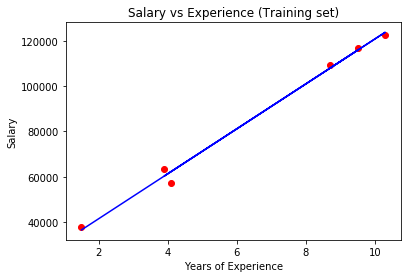

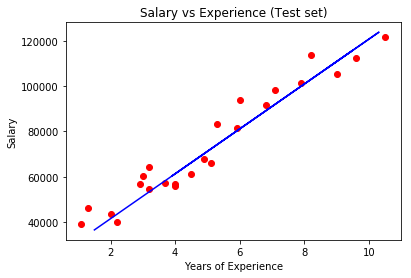

In [5]:
# Plotting
# Visualising the Test set results
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, univariateTest(m,c,X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, univariateTest(m,c,X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()





In [10]:
# Boston DataSet

boston = Datasets.load_boston()
df = pd.DataFrame(boston.data)

X = df.values
Y = boston.target

X_test, X_train, Y_test, Y_train = cv.train_test_split(X,Y,test_size=0.2,random_state=0)
for i in range(X.shape[-1]):
    m,b = univariateFit(X_train[:,i],Y_train)
    Y_predicted = univariateTest(m,b,X_test[:,i])
    print("Score for i = ",i," is = ",acc(Y_test,Y_predicted))

Score for i =  0  is =  0.141856856265
Score for i =  1  is =  0.100343458973
Score for i =  2  is =  0.23389658228
Score for i =  3  is =  0.0295589460117
Score for i =  4  is =  0.178574723461
Score for i =  5  is =  0.487736153052
Score for i =  6  is =  0.132826574418
Score for i =  7  is =  0.0517866310924
Score for i =  8  is =  0.128925213848
Score for i =  9  is =  0.216331015493
Score for i =  10  is =  0.23503993691
Score for i =  11  is =  0.108349870762
Score for i =  12  is =  0.56550783609
